<a href="https://colab.research.google.com/github/FunSizeNanoByte/kitkats/blob/Collab/PA_replace_NA_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: give me code for importing seaborn, numpy,pandas, and matplot.yplot
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#load data from seaborn
tips_data=sns.load_dataset('tips')


In [ ]:
tips_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
#for numberic variables
tips_data.describe()


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
#for categorical variable
tips_data[['sex','smoker']].value_counts()
#due to more than one, we needed the double bracket  ...if one value, use one set of brackets.


sex     smoker
Male    No        97
        Yes       60
Female  No        54
        Yes       33
dtype: int64

In [ ]:
tips_data['total_bill'].iloc[10:15] = None
#                                       None is capped.

<ipython-input-137-206b3220c509>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tips_data['total_bill'].iloc[10:15] = None


In [ ]:
tips_data.head(20)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [ ]:
#count up missing values
sum(tips_data['total_bill'].isna())


5

In [ ]:
tips_data_clean = tips_data.dropna()
#takes tips_data and gives us a new tips_data_clean without missing values.

In [ ]:
#input na values with mean
#we make a value for mean
mean_total_bill=tips_data['total_bill'].mean()
#we have a new value
mean_total_bill

19.805690376569036

In [ ]:
#fill in NULL values of 'total_bill'
tips_data['total_bill'].fillna(mean_total_bill,inplace=True)

In [ ]:
tips_data['total_bill_inputed'] = tips_data['total_bill'].fillna(mean_total_bill)

In [ ]:
#calculate z-scores
z_scores = (tips_data['total_bill']-tips_data['total_bill'].mean())/ tips_data['total_bill'].std()
z_scores

0     -0.319414
1     -1.073794
2      0.136618
3      0.439504
4      0.542735
         ...   
239    1.046412
240    0.836546
241    0.324929
242   -0.225258
243   -0.116355
Name: total_bill, Length: 244, dtype: float64

In [ ]:
#set a threshold or outliers (e.g., s-score>3)
threshold = 3
#^define threshold            \/Theory: numpy plays with subsets, why you get multiple values.
#\/new set        \/old set \/NUMPY! \/out zscores, made before
outliers_zscore = tips_data[np.abs(z_scores)>threshold]
#                               /\want an absolute value from this.
#gives up the outliers for the z scores we made (threshold was set before)
print(outliers_zscore)
#show it.

     total_bill    tip   sex smoker  day    time  size  total_bill_inputed
59        48.27   6.73  Male     No  Sat  Dinner     4               48.27
156       48.17   5.00  Male     No  Sun  Dinner     6               48.17
170       50.81  10.00  Male    Yes  Sat  Dinner     3               50.81
212       48.33   9.00  Male     No  Sat  Dinner     4               48.33


In [ ]:
outliers_zscore.shape
#this gives u length x width.  so you have 4 outliers

(4, 8)

In [ ]:
#^a better way to o this\/
len(outliers_zscore)

4

In [ ]:
outliers=len(outliers_zscore)
outliers
#how to print a number of outliers

4

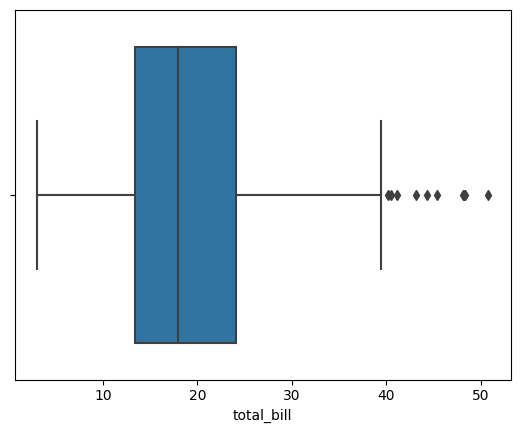

In [ ]:
sns.boxplot(x=tips_data['total_bill'])
#create a box plot for the total_bill column
#display
plt.show()

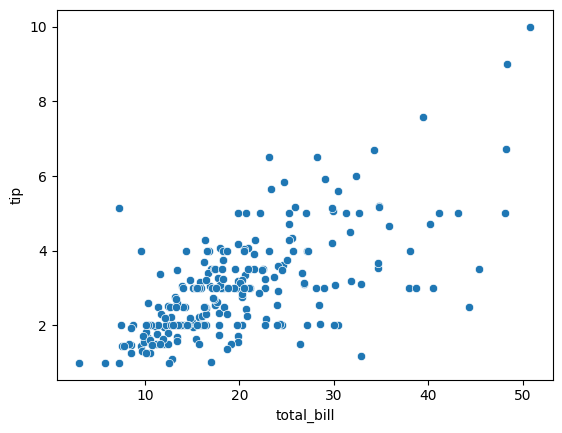

In [ ]:
sns.scatterplot(x='total_bill',y='tip',data=tips_data)
plt.show()


##Tukey's Fence

In [ ]:
tips_data

,total_bill,tip,sex,smoker,day,time,size,total_bill_inputed
0,16.99,1.01,Female,No,Sun,Dinner,2,16.99
1,10.34,1.66,Male,No,Sun,Dinner,3,10.34
2,21.01,3.50,Male,No,Sun,Dinner,3,21.01
3,23.68,3.31,Male,No,Sun,Dinner,2,23.68
4,24.59,3.61,Female,No,Sun,Dinner,4,24.59
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,29.03
240,27.18,2.00,Female,Yes,Sat,Dinner,2,27.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,22.67
242,17.82,1.75,Male,No,Sat,Dinner,2,17.82


In [ ]:
#calcing interquartile range
q1=tips_data['total_bill'].quantile(0.25)
q3=tips_data['total_bill'].quantile(0.75)
iqr=q3-q1
iqr

10.679999999999998

In [ ]:
#set a threshold for outliers (eg 1.5 times iqr)
theshold = 1.5
lower_fence = q1 - threshold * iqr
upper_fence = q3 + threshold * iqr
outliers_tukey = tips_data[(tips_data['total_bill']<lower_fence) | (tips_data['total_bill']>upper_fence)]


In [ ]:
lower_fence

-18.654999999999994

In [ ]:
upper_fence

56.10499999999999

In [ ]:
outliers_tukey.shape
#somethings wrong. we lost every row on this sample problem.

(0, 8)

In [ ]:
telecomCustType 3G